# Titanic Prediction problem

Importing librarys

In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Read the file and display some data

In [115]:
df_train = pd.read_csv('train.csv', delimiter=',', header='infer')
df_test = pd.read_csv('test.csv', delimiter=',', header='infer')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Clean the data

In [116]:
df_train = df_train[df_train.Age.notna()]

numeric_features = ['Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
catagorical_features = ['Sex', 'Pclass', 'Embarked']

features = ['Sex', 'Pclass', 'Embarked', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
label = ['Survived']

x_train, y_train = df_train[features].values, df_train[label].values
x_test = df_test[features].values
y_test = pd.read_csv('gender_submission.csv', delimiter=',', header='infer')['Survived'].values

Normalize the data

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

numeric_features = [3, 4, 5, 7]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

catagorical_features = [0, 1, 2]
catagorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', HistGradientBoostingClassifier())])


Getting the optimal model

In [118]:
from sklearn.model_selection import GridSearchCV

params = {
    'classifier__learning_rate': [0.06, 0.05, 0.07],
    'classifier__max_iter': [75, 80, 85],
    'classifier__max_depth': [6, 7, 8],
    'classifier__min_samples_leaf': [6, 7, 8],
    'classifier__l2_regularization': [0.008, 0.01, 0.013]
}

gridsearch = GridSearchCV(pipeline, params, cv=3, return_train_score=True)

model = gridsearch.fit(x_train, y_train.ravel())

print("Best parameters: ", model.best_params_, "\n")

best_model = model.best_estimator_

Best parameters:  {'classifier__l2_regularization': 0.008, 'classifier__learning_rate': 0.06, 'classifier__max_depth': 6, 'classifier__max_iter': 75, 'classifier__min_samples_leaf': 8} 



Evaluate

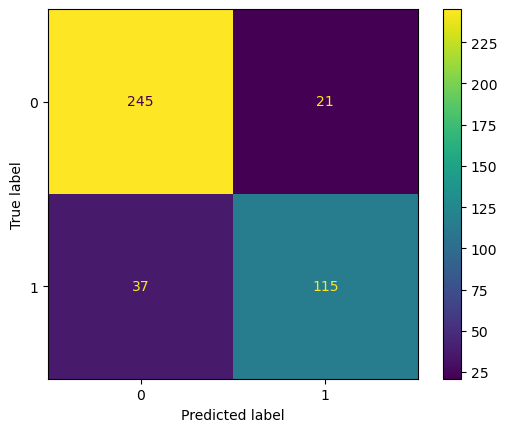

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

predictions = best_model.predict(x_test)

accuracy_score(y_test, predictions)
classification_report(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()